# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

In [2]:
zipf = zipfile.ZipFile('data_all.zip')
data = pd.read_csv(zipf.open('data_all.csv'))

In [3]:
print(data.shape)
print(data.head())

(116322, 785)
      e    1    2    3    4    5    6    7    8    9  ...  775  776  777  778  \
0  36.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  33.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  30.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 785 columns]


In [4]:
data['e'].unique()

array([36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.,  4., 47.,  7.,
       32., 60., 18., 46., 59., 12., 37., 53., 15.,  1.,  9., 38., 43.,
       44., 19., 55.,  6., 58., 41., 20., 29., 28., 31., 42., 39., 25.,
       49., 35., 14., 57., 34., 26., 61., 11., 13., 27., 51., 23., 10.,
       22., 56., 48., 52., 16., 17., 54., 21., 50., 45.])

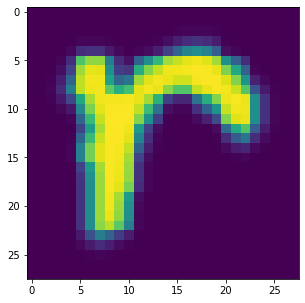

In [5]:
matriz_datos=data.values
plt.figure(figsize=(5,5))
plt.imshow(matriz_datos[29,1:].reshape(28,28))
plt.show()

In [6]:
e = list(data['e'].unique())
e.sort()
e[0]

0.0

In [7]:
prueba = data.sort_values(by = ['e']).reset_index(drop = True)
prueba

e    1    2    3    4    5    6    7    8    9  ...  775  776  777  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
116317  61.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
116318  61.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
116319  61.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
116320  61.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
116321  61.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        778  779  780  781  782  783  784  
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  
116317  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
116318  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
116319  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
116320  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
116321  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[116322 rows x 785 columns]

In [8]:
numeros = e[0:10]
mayusculas = e[10:-26]
minusculas = e[-26:]

In [9]:
num = data[(data.e >= 0.0) & (data.e <= 9.0)]
mayu = data[(data.e >= 10.0) & (data.e <= 35.0)]
minu = data[(data.e >= 36.0) & (data.e <= 61.0)]

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [10]:
# MAYUSCULAS
from sklearn.model_selection import train_test_split

y = mayu['e']
X =mayu.iloc[:, mayu.columns != 'e']

MX_train, MX_test, My_train, My_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier as DTC

dt=DTC()
dt.fit(MX_train, My_train)

train_score=dt.score(MX_train, My_train)
test_score=dt.score(MX_test, My_test)
print (train_score, test_score)

1.0 0.7174988036369437


In [12]:
# Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RFC

rf=RFC()
rf.fit(MX_train, My_train)

train_score=rf.score(MX_train, My_train)
test_score=rf.score(MX_test, My_test)
print (train_score, test_score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.997966182804275 0.8607433402456532


In [15]:
# SVC
from sklearn.svm import SVC

svc=SVC()
svc.fit(MX_train, My_train)

train_score=svc.score(MX_train, My_train)
test_score=svc.score(MX_test, My_test)
print (train_score, test_score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0 0.13287605678736641


In [14]:
# KNNC
from sklearn.neighbors import KNeighborsClassifier as KNNC

knnc=KNNC()
knnc.fit(MX_train, My_train)

train_score=knnc.score(MX_train, My_train)
test_score=knnc.score(MX_test, My_test)
print (train_score, test_score)

0.9183681607911948 0.881639814962514


* Try to do the same thing with lowercases.

In [19]:
# MINUSCULAS
y = minu['e']
X = minu.iloc[:, minu.columns != 'e']

MX_train, MX_test, My_train, My_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
# Decision Tree
dt=DTC()
dt.fit(MX_train, My_train)

train_score=dt.score(MX_train, My_train)
test_score=dt.score(MX_test, My_test)
print (train_score, test_score)


1.0 0.725609756097561


In [18]:
# Forest Classifier
rf=RFC()
rf.fit(MX_train, My_train)

train_score=rf.score(MX_train, My_train)
test_score=rf.score(MX_test, My_test)
print (train_score, test_score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9970896660045272 0.8370288248337029


In [21]:
# KNNC
knnc=KNNC()
knnc.fit(MX_train, My_train)

train_score=knnc.score(MX_train, My_train)
test_score=knnc.score(MX_test, My_test)
print (train_score, test_score)

0.9034046288169262 0.8628972653362897


In [22]:
# **SVC
svc=SVC()
svc.fit(MX_train, My_train)

train_score=svc.score(MX_train, My_train)
test_score=svc.score(MX_test, My_test)
print (train_score, test_score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0 0.15336289726533628


* Try to do the same thing with numbers.

In [23]:
# NUMEROS
y = num['e']
X = num.iloc[:, num.columns != 'e']

MX_train, MX_test, My_train, My_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
# Decision Tree
dt=DTC()
dt.fit(MX_train, My_train)

train_score=dt.score(MX_train, My_train)
test_score=dt.score(MX_test, My_test)
print (train_score, test_score)


1.0 0.893128453038674


In [25]:
# Forest Classifier
rf=RFC()
rf.fit(MX_train, My_train)

train_score=rf.score(MX_train, My_train)
test_score=rf.score(MX_test, My_test)
print (train_score, test_score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9994604394181379 0.9523480662983426


In [ ]:
# KNNC
knnc=KNNC()
knnc.fit(MX_train, My_train)

train_score=knnc.score(MX_train, My_train)
test_score=knnc.score(MX_test, My_test)
print (train_score, test_score)

In [ ]:
# **SVC
svc=SVC()
svc.fit(MX_train, My_train)

train_score=svc.score(MX_train, My_train)
test_score=svc.score(MX_test, My_test)
print (train_score, test_score)